<a href="https://colab.research.google.com/github/mariyam-ahmed/portfolio/blob/main/Diabetes_Data_Vis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This dataset, using data collected by the CDC, contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy.

In [ ]:
#loading libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv('out.csv')

In [ ]:
df

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,1,1,1,40,1,0,0,0,0,1,...,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,1,0,0,1,0,0,...,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,0,0,0,0,1,0,...,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,0,0,0,1,1,1,...,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,0,0,0,1,1,1,...,0,2,3,0,0,0,11,5,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1,1,1,45,0,0,0,0,1,1,...,0,3,0,5,0,1,5,6,7,0
253676,1,1,1,18,0,0,0,0,0,0,...,0,4,0,0,1,0,11,2,4,1
253677,0,0,1,28,0,0,0,1,1,0,...,0,1,0,0,0,0,2,5,2,0
253678,1,0,1,23,0,0,0,0,1,1,...,0,3,0,0,0,1,7,5,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                253680 non-null  int64
 1   HighChol              253680 non-null  int64
 2   CholCheck             253680 non-null  int64
 3   BMI                   253680 non-null  int64
 4   Smoker                253680 non-null  int64
 5   Stroke                253680 non-null  int64
 6   HeartDiseaseorAttack  253680 non-null  int64
 7   PhysActivity          253680 non-null  int64
 8   Fruits                253680 non-null  int64
 9   Veggies               253680 non-null  int64
 10  HvyAlcoholConsump     253680 non-null  int64
 11  AnyHealthcare         253680 non-null  int64
 12  NoDocbcCost           253680 non-null  int64
 13  GenHlth               253680 non-null  int64
 14  MentHlth              253680 non-null  int64
 15  PhysHlth              253680 non-n

###Understanding Features:
There are 20 features in this dataset.

**Diabetes_binary [Target]:** 0 = no diabetes, 1 = prediabetes or diabetes

**HighBP:** 0 = no high BP, 1 = high BP

**HighChol:** 0 = no high cholesterol, 1 = high cholesterol

**CholCheck:**	0 = no cholesterol check in 5 years, 1 = yes cholesterol check in 5 years

**BMI:** Body Mass Index

**Smoker:**	Have you smoked at least 100 cigarettes in your entire life? 0 = no, 1 = yes

**Stroke:** (Ever told) you had a stroke. 0 = no, 1 = yes

**HeartDiseaseorAttack:** coronary heart disease (CHD) or myocardial infarction (MI) 0 = no, 1 = yes

**PhysActivity:** physical activity in past 30 days - not including job 0 = no, 1 = yes

**Fruits:** Consume Fruit 1 or more times per day 0 = no, 1 = yes

**Veggies:** Consume Vegetables 1 or more times per day 0 = no, 1 = yes

**HvyAlcoholConsump:** Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) 0 = no, 1 = yes

**AnyHealthcare: **Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no, 1 = yes

**NoDocbcCost:** Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no, 1 = yes

**GenHlth:** Would you say that in general your health is? scale 1-5 1 = excellent, 2 = very good, 3 = good, 4 = fair, 5 = poor

**MentHlth:** Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? scale 1-30 days

**PhysHlth:** Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? scale 1-30 days

**DiffWalk:** Do you have serious difficulty walking or climbing stairs? 0 = no, 1 = yes

**Sex:**	0 = female, 1 = male

**Age:** 13-level scale, 1 = 18-24, 9 = 60-64, 13 = 80 or older

**Education:** scale 1-6, 1 = Never attended school or only kindergarten, 2 = Grades 1 through 8 (Elementary), 3 = Grades 9 through 11 (Some high school), 4 = Grade 12 or GED (High school graduate), 5 = College 1 year to 3 years (Some college or technical school), 6 = College 4 years or more (College graduate)

**Income:** scale 1-8, 1 = less than \$10,000, 5 = less than \$35,000, 8 = \$75,000 or more

# Data Visualization in PySpark

In [ ]:
! pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488493 sha256=2f39d492d8dbfa6bbc24ac6668499f4313f19418bc8acd83db2fe11c0370be3e
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [ ]:
! pip install findspark

In [ ]:
import findspark
findspark.init()

from pyspark.sql import SparkSession

In [ ]:
spark = SparkSession.builder.appName('Name').config('config_option', 'value').getOrCreate()

In [ ]:
df = spark.read.option('inferSchema', True).csv('out.csv', header=True)
df.show(2)

+------+--------+---------+---+------+------+--------------------+------------+------+-------+-----------------+-------------+-----------+-------+--------+--------+--------+---+---+---------+------+---------------+
|HighBP|HighChol|CholCheck|BMI|Smoker|Stroke|HeartDiseaseorAttack|PhysActivity|Fruits|Veggies|HvyAlcoholConsump|AnyHealthcare|NoDocbcCost|GenHlth|MentHlth|PhysHlth|DiffWalk|Sex|Age|Education|Income|Diabetes_binary|
+------+--------+---------+---+------+------+--------------------+------------+------+-------+-----------------+-------------+-----------+-------+--------+--------+--------+---+---+---------+------+---------------+
|     1|       1|        1| 40|     1|     0|                   0|           0|     0|      1|                0|            1|          0|      5|      18|      15|       1|  0|  9|        4|     3|              0|
|     0|       0|        0| 25|     1|     0|                   0|           1|     0|      0|                0|            0|          1|  

In [ ]:
df.printSchema()

root
 |-- HighBP: integer (nullable = true)
 |-- HighChol: integer (nullable = true)
 |-- CholCheck: integer (nullable = true)
 |-- BMI: integer (nullable = true)
 |-- Smoker: integer (nullable = true)
 |-- Stroke: integer (nullable = true)
 |-- HeartDiseaseorAttack: integer (nullable = true)
 |-- PhysActivity: integer (nullable = true)
 |-- Fruits: integer (nullable = true)
 |-- Veggies: integer (nullable = true)
 |-- HvyAlcoholConsump: integer (nullable = true)
 |-- AnyHealthcare: integer (nullable = true)
 |-- NoDocbcCost: integer (nullable = true)
 |-- GenHlth: integer (nullable = true)
 |-- MentHlth: integer (nullable = true)
 |-- PhysHlth: integer (nullable = true)
 |-- DiffWalk: integer (nullable = true)
 |-- Sex: integer (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Education: integer (nullable = true)
 |-- Income: integer (nullable = true)
 |-- Diabetes_binary: integer (nullable = true)



#Univariate Analysis

## Histogram


In [ ]:
def histogram(df, col, bins=10, xname=None, yname=None):

    '''
    This function makes a histogram from spark dataframe named
    df for column name col.
    '''

    # Calculating histogram in Spark
    vals = df.select(col).rdd.flatMap(lambda x: x).histogram(bins)

    # Preprocessing histogram points and locations
    width = vals[0][1] - vals[0][0]
    loc = [vals[0][0] + (i+1) * width for i in range(len(vals[1]))]

    # Making a bar plot
    plt.bar(loc, vals[1], width=width)
    plt.xlabel(col)
    plt.ylabel(yname)
    plt.show()

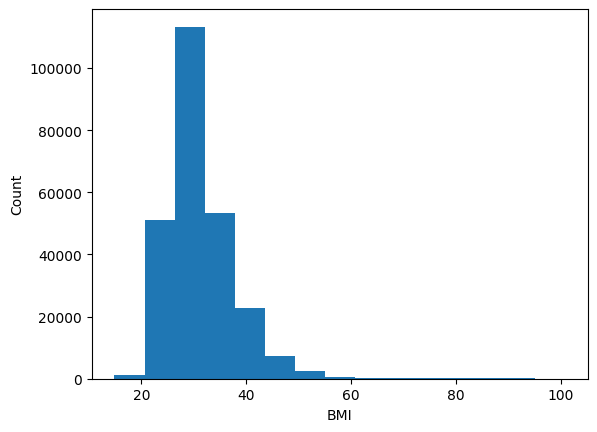

In [ ]:
# Plotting the BMI histogram

histogram(df, 'BMI', bins=15, yname='Count')

BMI distribution is highly skewed to the right, indicating some people have very high BMI.

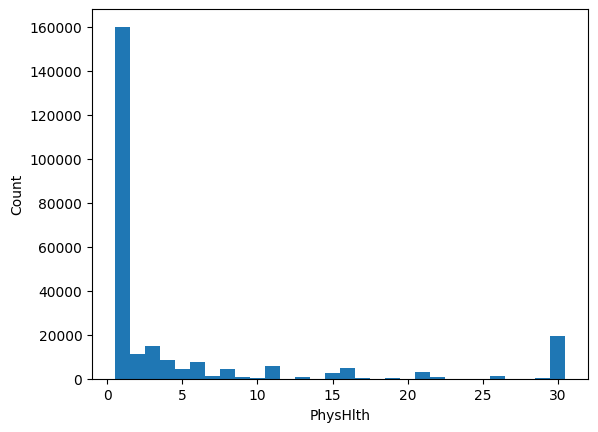

In [ ]:
histogram(df, 'PhysHlth', bins=30, yname='Count')

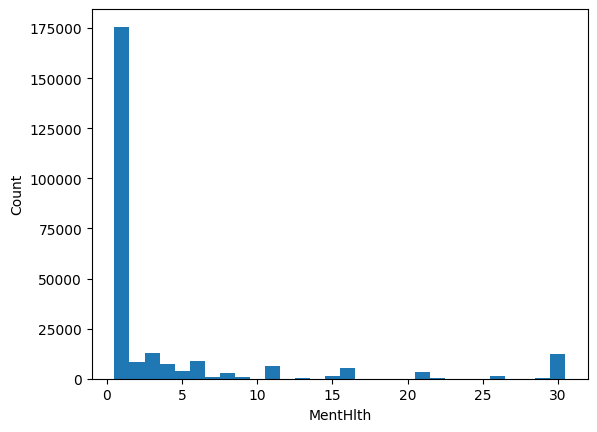

In [ ]:
histogram(df, 'MentHlth', bins=30, yname='Count')

This distribution is also highly skewed to the right, with a spike at the 30 day value. Thus a small but significant subset of the population reports poor health for all of the last 30 days.

##Bar plot


In [ ]:
def barplot(df, col, lim=10, yname=None):

    '''
    This function makes a bar plot for the Spark dataframe df
    for categorical column col only selecting top categories
    as specified by lim.
    '''

    # Grouping by the categories, counting on each categories
    # and ordering them by the count
    classes = df.groupBy(col).count().orderBy('count', ascending=False)

    # Take first 'lim' number of rows and convert to pandas
    pd_df = classes.limit(lim).toPandas()

    # Making plot
    pd_df.plot(kind='bar', x=col, legend=False)
    plt.ylabel(yname)
    plt.show()

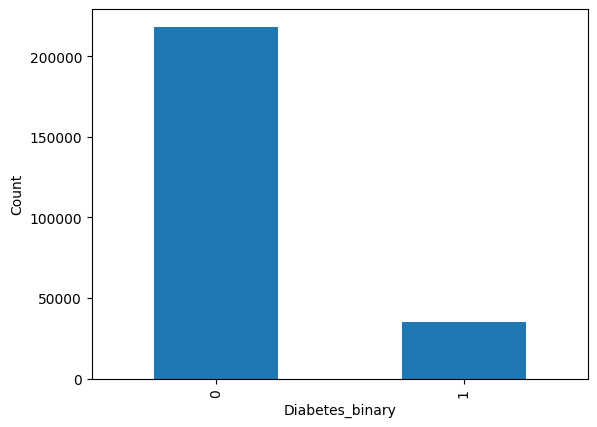

In [ ]:
barplot(df, 'Diabetes_binary', lim=20, yname='Count')

The target variable is moderately imbalanced, which will become pertinent during data preprocessing and modelling phases.

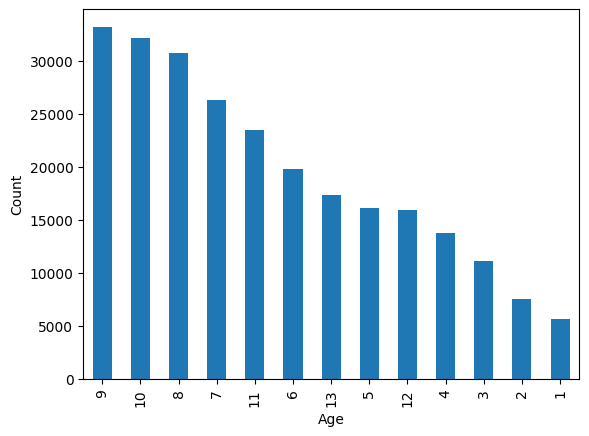

In [ ]:
barplot(df, 'Age', lim=20, yname='Count')

Most instances in the dataset belong to the higher age groups.

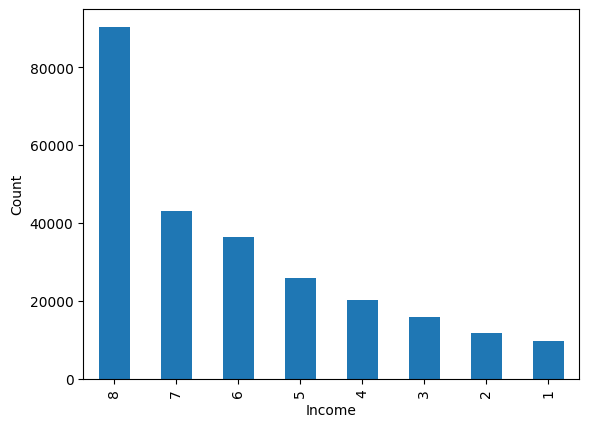

In [ ]:
barplot(df, 'Income', lim=20, yname='Count')

Most people earn more than \$75,000 per year, and thus belong to a middle class background. Therefore, this dataset may not be representative of the general population or those from less fortunate backgrounds.

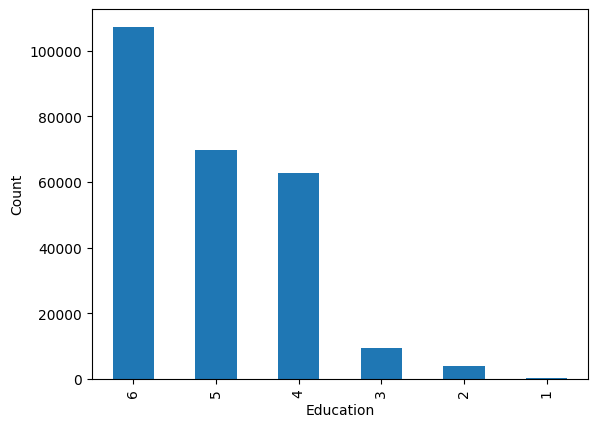

In [ ]:
barplot(df, 'Education', lim=20, yname='Count')

Most people in this sample are highly-educated.

##Pie chart


In [ ]:
def pieplot(df, col, lim=10, yname=None):

    '''
    This function makes a pie chart for the Spark dataframe df
    for categorical column col only selecting top categories
    as specified by lim.
    '''

    # Grouping by the categories, counting on each categories
    # and ordering them by the count
    classes = df.groupBy(col).count().orderBy('count', ascending=False)

    # Take first 'lim' number of rows and convert to pandas
    pd_df = classes.limit(lim).toPandas()

    # Making plot
    pd_df.plot(kind='pie', x=col, y='count', \
           labels=pd_df[col], legend=False)
    plt.title(col)
    plt.show()

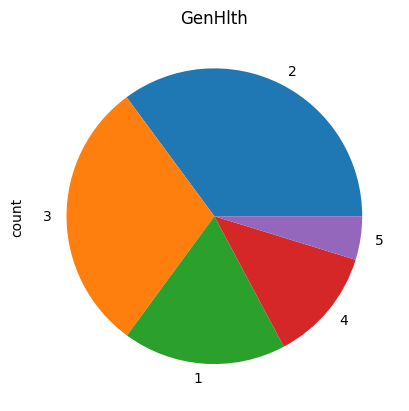

In [ ]:
pieplot(df, 'GenHlth')

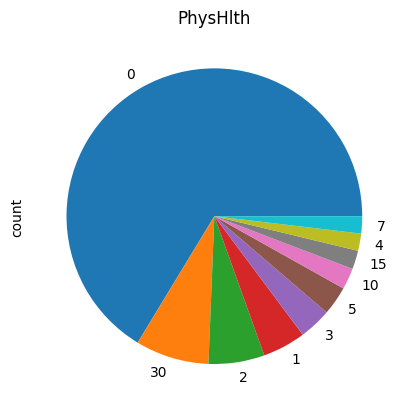

In [ ]:
pieplot(df, 'PhysHlth')

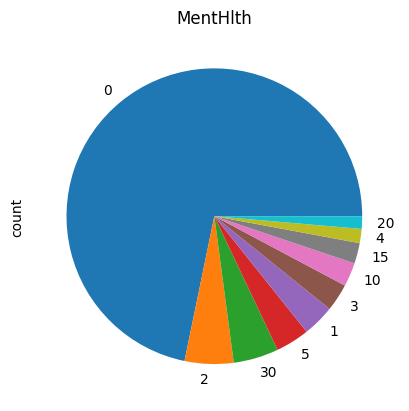

In [ ]:
pieplot(df, 'MentHlth')

From these pie charts, we can see that most people rate their general health as good or fair, and report that their mental and physical health has been good for most of the last 30 days. However, an interesting subset of the sample report poor physical health for all of the last 30 days.

#Multivariate Analysis

##Heatmap

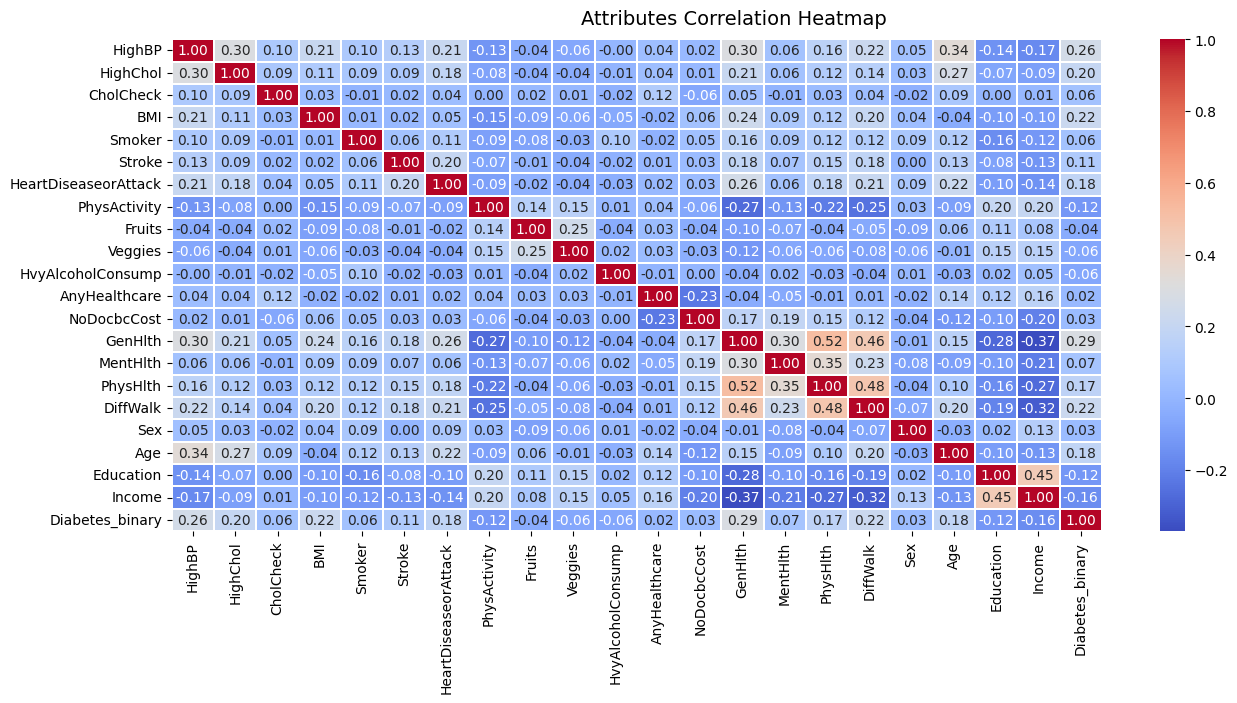

In [ ]:
df1 = pd.read_csv('out.csv')
f, ax = plt.subplots(figsize=(15, 6))
corr = df1.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
            linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Attributes Correlation Heatmap', fontsize=14)

Several features are weakly correlated to each other, such as Income and General Health being negatively associated, meaning general health reported is better as income increases, which is somewhat expected. We may want to control for this multicollinearity at the modeling stage.   

##Pairplot

In [ ]:
def pairplot(df, cols, samp_size=10000):

  true_samp_size = min(samp_size/df.count(), 1.0)
  pd_df = df.sample(False, true_samp_size).toPandas()
  pp = sns.pairplot(pd_df[cols], hue='Diabetes_binary', size=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="black", linewidth=0.5))
  fig = pp.fig
  fig.subplots_adjust(top=0.93, wspace=0.3)
  t = fig.suptitle('Attributes Pairwise Plots', fontsize=14)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


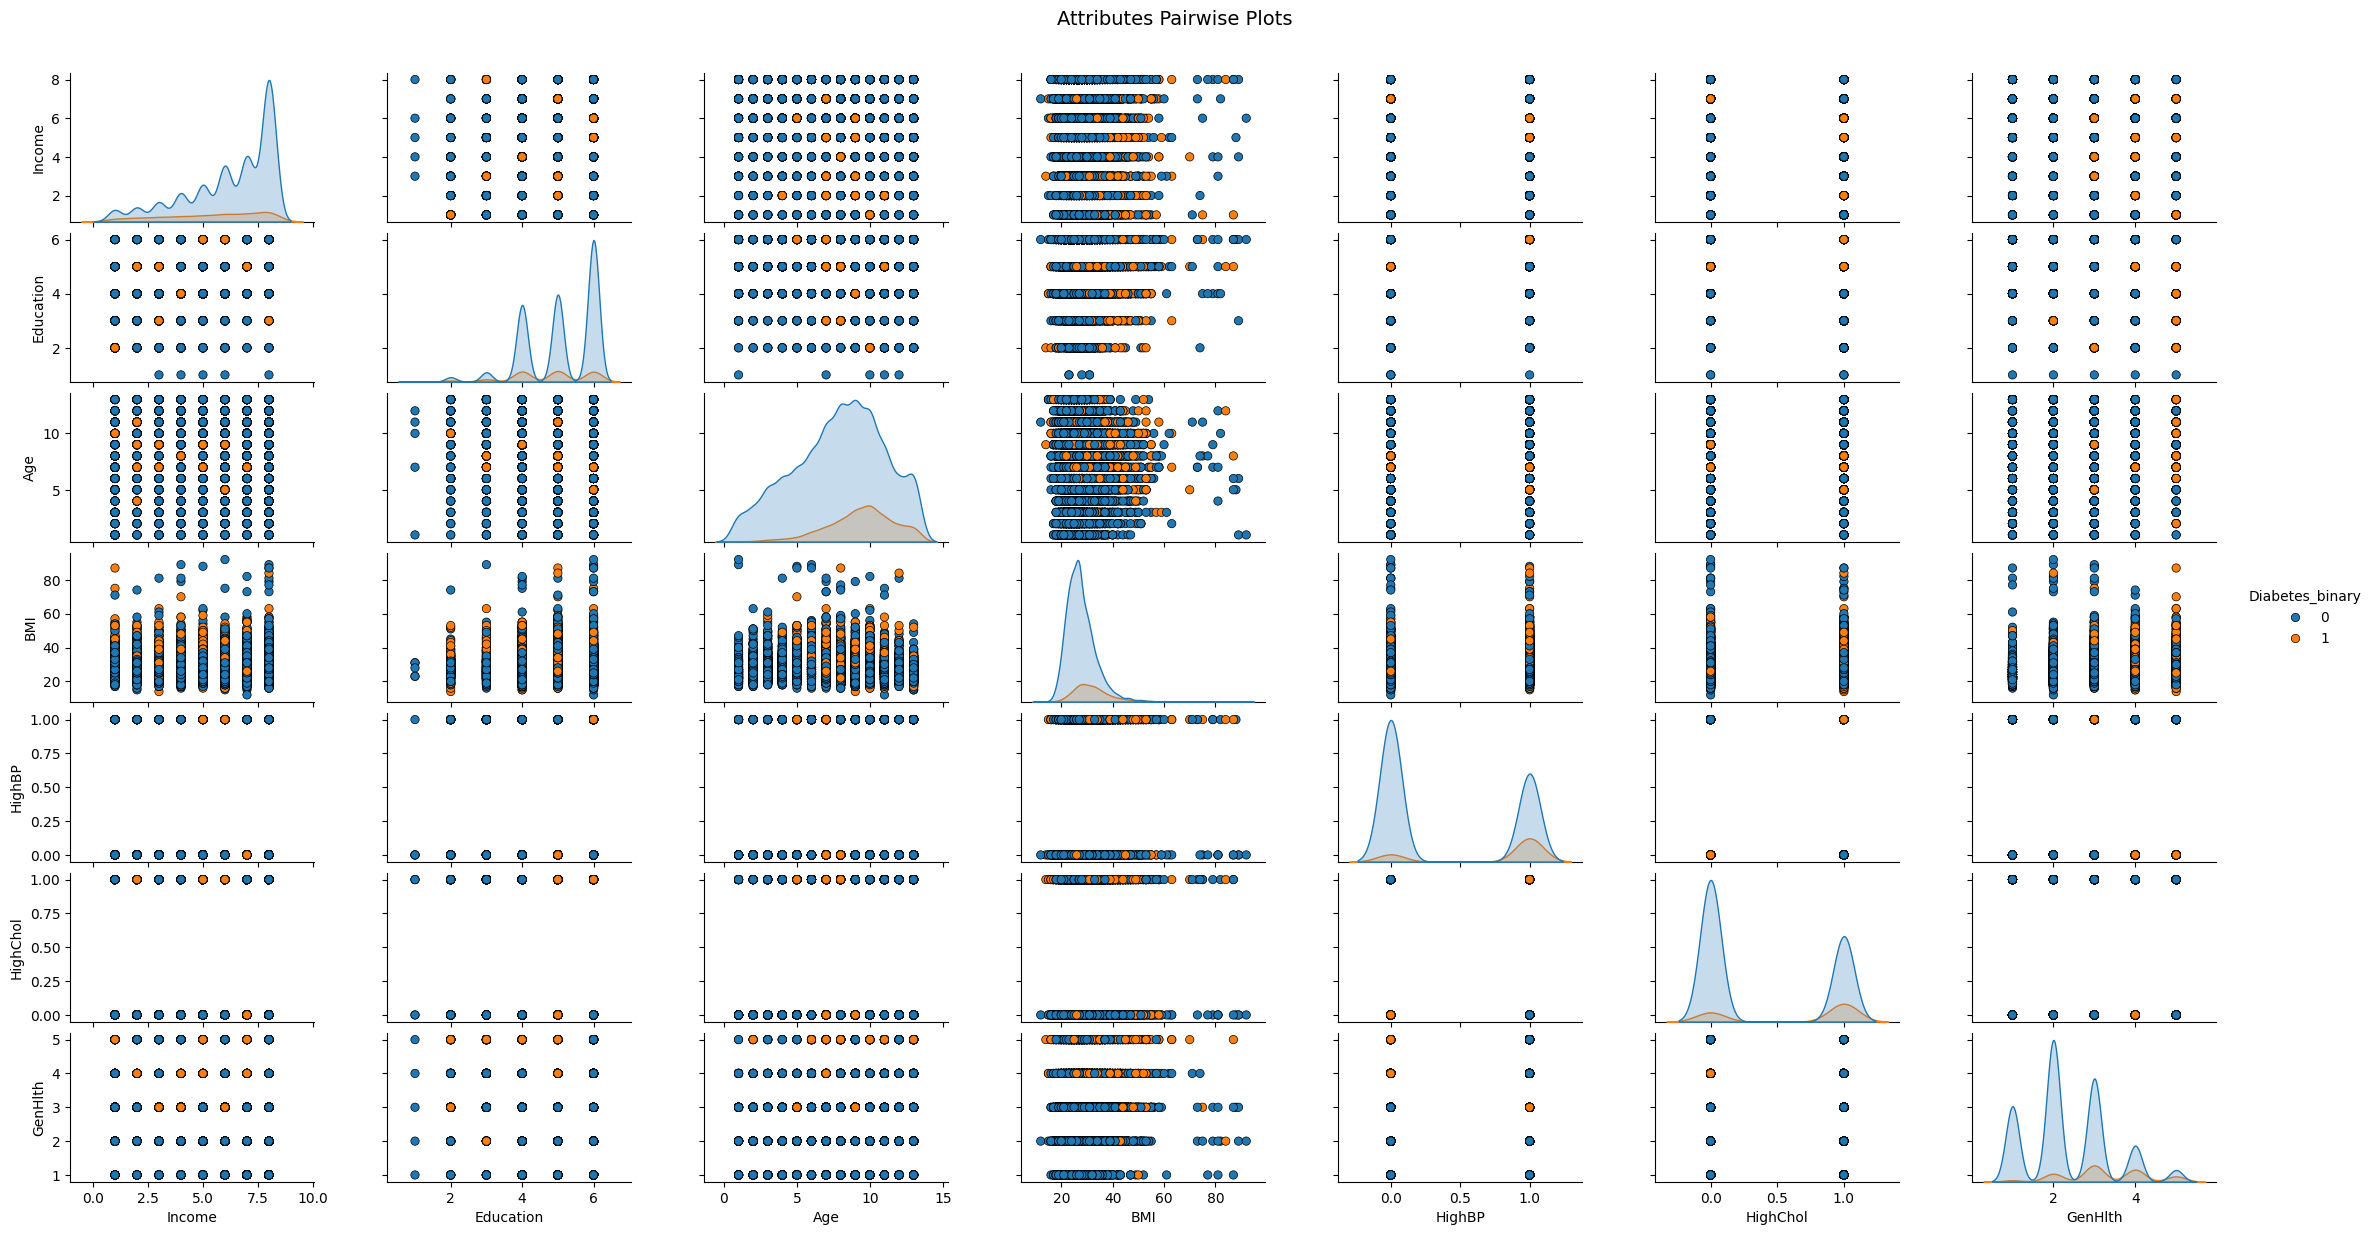

In [ ]:
cols = ['Diabetes_binary','Income', 'Education', 'Age', 'BMI', 'HighBP', 'HighChol', 'GenHlth']
pairplot(df, cols, 10000)

High cholesterol and high BP are associated with diabetes. Further, the mean age and BMI of people with diabetes tends to be slighty higher, and their general health tends to be worse.